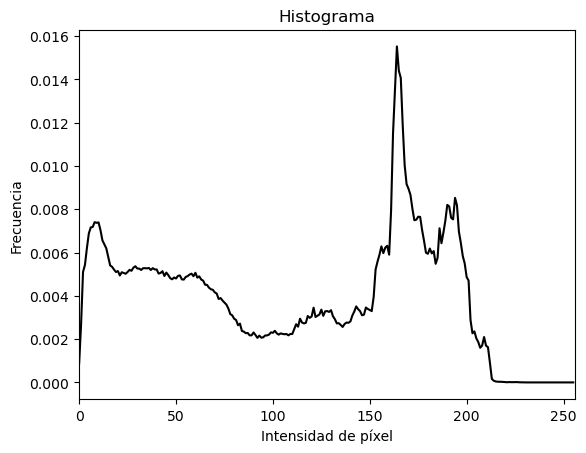

In [2]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('data/BBDD/bbdd_00000.jpg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist /= hist.sum()

plt.plot(hist, color='black')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255
plt.show()


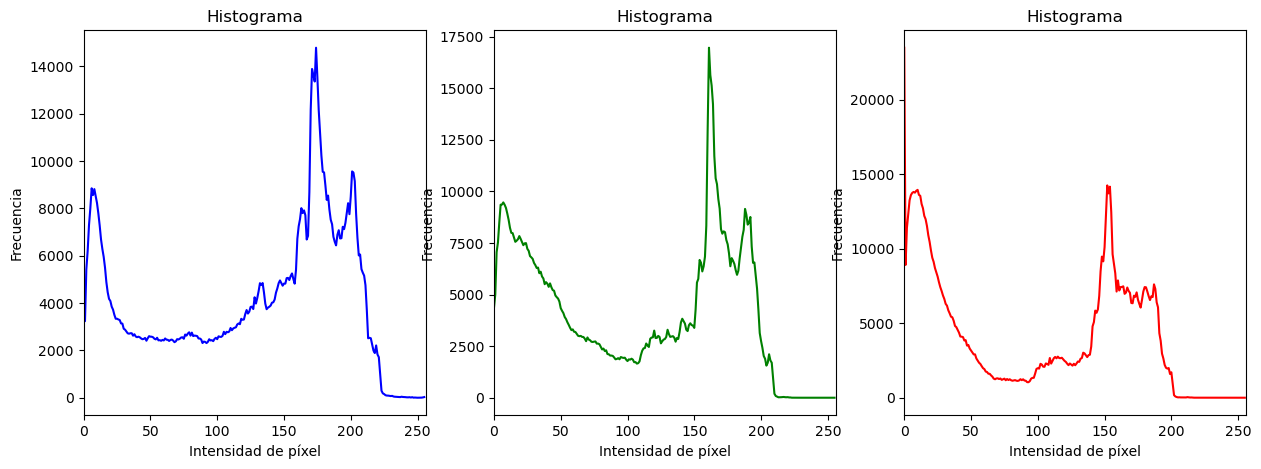

In [3]:
img_RGB=cv2.imread('data/BBDD/bbdd_00000.jpg')


B, G, R = cv2.split(img_RGB)

hist_B = cv2.calcHist([R], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_R = cv2.calcHist([B], [0], None, [256], [0, 256])


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(hist_B, color='blue')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255

plt.subplot(1, 3, 2)
plt.plot(hist_G, color='green')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255

plt.subplot(1, 3, 3)
plt.plot(hist_R, color='red')
plt.title('Histograma')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.xlim([0, 256])  # Asegurarse de que el eje X cubra el rango de 0 a 255
plt.show()

#cv2.imshow('RGB Image', img_RGB)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [13]:
import os
import pickle

directory = 'data/BBDD/'

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(directory, filename)

        img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hist_grey = cv2.calcHist([img_grey], [0], None, [256], [0, 256])
        hist_grey /= hist_grey.sum() # changed "hist.sum() to hist_grey.sum()"


        # RGB
        img_RGB=cv2.imread(img_path)
        B, G, R = cv2.split(img_RGB)

        hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
        hist_B /= hist_R.sum()

        hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
        hist_G /= hist_G.sum()

        hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
        hist_R /= hist_B.sum()


        histograms = {
            'grey': hist_grey,
            'hist_B': hist_B,
            'hist_G': hist_G,
            'hist_R': hist_R,
        }

        pkl_filename = os.path.splitext(filename)[0] + '.pkl'
        pkl_path = os.path.join(directory, pkl_filename)

        with open(pkl_path, 'wb') as pkl_file:
            pickle.dump(histograms, pkl_file)
        

In [5]:
import numpy as np

def euc_dist(h1, h2):
    
    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")    
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sqrt(np.sum((h1 - h2) ** 2))

    return distance   

def L1_dist(h1, h2):
    
    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sum(np.abs(h1 - h2))
    
    return distance
    
def X2_distance(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")

    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sum((np.sqrt(h1 - h2) ** 2) / (h1 + h2))

    return distance

def histogram_similiarity(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")

    h1 = np.array(h1)
    h2 = np.array(h2)

    similiarity = np.sum(np.minimum(h1, h2))
    return similiarity

def hellinger_kernel(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")
    
    h1 = np.array(h1)
    h2 = np.array(h2)
    
    similiarity = np.sum(np.sqrt(h1*h2))
    return similiarity


In [14]:
with open('data/BBDD/bbdd_00000.pkl', 'rb') as pkl_file:
    histograms = pickle.load(pkl_file)


In [42]:
import numpy as np
import os
import pandas as pd

def euc_dist(h1, h2):
    
    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")    
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sqrt(np.sum((h1 - h2) ** 2))

    return distance   

def L1_dist(h1, h2):
    
    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sum(np.abs(h1 - h2))
    
    return distance
    
def X2_distance(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")

    h1 = np.array(h1)
    h2 = np.array(h2)

    distance = np.sum(((h1 - h2) ** 2) / (h1 + h2 + 1e-6))

    return distance

def histogram_similiarity(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")

    h1 = np.array(h1)
    h2 = np.array(h2)

    similiarity = np.sum(np.minimum(h1, h2))
    
    return similiarity

def hellinger_kernel(h1, h2):

    if len(h1) != 256 or len(h2) != 256:
        raise ValueError("Both histograms must have a length of 256")
    
    h1 = np.array(h1)
    h2 = np.array(h2)

    similiarity = np.sum(np.sqrt(h1*h2))

    return similiarity

directory = 'data/BBDD/'


for file_compare_image in os.listdir(directory): #catch the fisrt image then the second and so on
    if file_compare_image.endswith('.pkl'):
        pkl_grey_path = os.path.join(directory, file_compare_image)
        with open(pkl_grey_path, 'rb') as pkl_file:
            histograms_first = pickle.load(pkl_file)


    for filename in os.listdir(directory): #catch image by imag
            print('fisrt image')
            print(file_compare_image)
            
        if filename.endswith('.pkl') and filename != file_compare_image and filename !='relationships.pkl':
            pkl_path = os.path.join(directory, filename)

            with open(pkl_grey_path, 'rb') as pkl_file:
            print('compare image')
            print(filename)
            histograms = pe.load(pkl_file)

            # grey
            hisam_first_grey = histograms_first['grey']
            histogram_grey = #histograms['grey']

            index=file_compare_image + '#-' + filename    
        table_data = #{'name': [index], 'euc_dist': [euc_dist(histogram_first_gre#y, histogram_grey)], 'L1_dist': [L1_dist(histogram_first_grey, histogram_grey)], 'X2_dist': [X2_distance(histogram_first_grey, histogram_grey)], 'histogram_similarity': [histogram_similiarity(histogram_first_grey, histogram_grey)],  'hellinger_kernel': [hellinger_kernel(histogram_first_grey, histogram_grey)]}  #print(euc_dist(histogram_first_grey, histogram_grey))
        df =  pd.DataFrame(table_data)     
            #print(L1_dist(histogram_first_grey, histogram_grey))
            #print(X2_distance(histogram_first_grey, histogram_grey))
            #print(histogram_similiarity(histogram_first_grey, histogram_grey))
            #print(hellinger_kernel(histogram_first_grey, histogram_grey))

        
        


IndentationError: unindent does not match any outer indentation level (<string>, line 78)

In [46]:
def load_and_print_pkl(pkl_file_path):
    # Open the pickle file in binary read mode
    with open(pkl_file_path, 'rb') as pkl_file:
        # Load the content using pickle
        data = pickle.load(pkl_file)
        
        # Print the content of the pkl file
        print("Content of the pickle file:")
        print(data)

# Example usage
pkl_file_path = 'data/BBDD/bbdd_00000.pkl'  
load_and_print_pkl(pkl_file_path)

Content of the pickle file:
{'grey': array([[8.75065743e-04],
       [2.69191503e-03],
       [5.09858737e-03],
       [5.43217594e-03],
       [6.20378088e-03],
       [6.88352808e-03],
       [7.16103520e-03],
       [7.18037365e-03],
       [7.40373321e-03],
       [7.37085752e-03],
       [7.39116315e-03],
       [7.03726895e-03],
       [6.56444347e-03],
       [6.37976127e-03],
       [6.19507860e-03],
       [5.80250798e-03],
       [5.40606910e-03],
       [5.33838477e-03],
       [5.21075074e-03],
       [5.09955455e-03],
       [5.14499983e-03],
       [4.94001200e-03],
       [5.08891838e-03],
       [5.05217537e-03],
       [5.01929969e-03],
       [5.10052126e-03],
       [5.20011457e-03],
       [5.15563600e-03],
       [5.29970741e-03],
       [5.36545832e-03],
       [5.26103051e-03],
       [5.25716320e-03],
       [5.19431289e-03],
       [5.27553447e-03],
       [5.27650164e-03],
       [5.26779890e-03],
       [5.28520392e-03],
       [5.19334618e-03],
       [5.276

In [43]:
directory = 'data/BBDD/'
#columns = ['name', 'euc_dist']
df = pd.DataFrame()

for file_compare_image in os.listdir(directory): #catch the fisrt image then the second and so on
    if file_compare_image.endswith('.pkl'):
        pkl_grey_path = os.path.join(directory, file_compare_image)
        with open(pkl_grey_path, 'rb') as pkl_file:
            histograms_first = pickle.load(pkl_file)
            print('fisrt image')
            print(file_compare_image)

        for filename in os.listdir(directory):
            if filename.endswith('.pkl') and filename != file_compare_image and filename!='relationships.pkl':
                pkl_path = os.path.join(directory, filename)
                print('compare image')
                print(filename)

                with open(pkl_path, 'rb') as pkl_file:
                    histograms = pickle.load(pkl_file)
            
                histogram_first_grey = histograms_first['grey']
                histogram_grey = histograms['grey']
                index=file_compare_image + '-' + filename
                new_line ={'name':index, 'euc_dist': euc_dist(histogram_first_grey, histogram_grey)}
                df = pd.concat([df, pd.DataFrame([new_line])], ignore_index=True)

compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image
bbdd_00000.jpg
compare image


KeyboardInterrupt: 

# Project 1

## Task 1

## Task 3

In [5]:
import os
import pickle

directory = 'qsd1_w1/'

for filename in os.listdir(directory):
    if filename.endswith('.jpg'):
        img_path = os.path.join(directory, filename)

        img_grey = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        hist_grey = cv2.calcHist([img_grey], [0], None, [256], [0, 256])
        hist_grey /= hist_grey.sum() # changed "hist.sum() to hist_grey.sum()"


        # RGB
        img_RGB=cv2.imread(img_path)
        B, G, R = cv2.spBit(imR_RGB)

        hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
        hist_B /= hist_B.sum()

        hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
        hist_G /= hist_G.sum()

        hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
        hist_R /= hist_R.sum()

        
            'grey': hist_grey,
            'hist_R': hist_R,
            'hist_G': hist_G,
            'hist_B': hist_B,
    

        pkl_filename = os.path.splitext(filename)[0] + '.pkl'
        pkl_path = os.path.join(directory, pkl_filename)

        with open(pkl_path, 'wb') as pkl_file:
            pickle.dump(histograms, pkl_file)



SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' on line 25 (3720688681.py, line 31)